#### I am importing all the packages will be needed

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

#### Reading in the housing set as well as calling the head of the df to look at data

In [2]:
df= pd.read_csv('../../../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Checking for null values 
 In order to decide what to do with the null values either drop or change to zeros 

In [3]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Checking for the correlation between the data frame
Making decisions on what to look at based on the data.

In [4]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


#### Creating a simple scatter plot to check on the correlation between price and sqft_living
Just to visulaize the correlation since they are the strongest correlated.

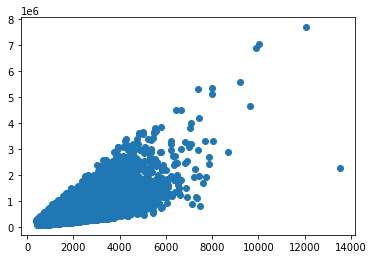

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [5]:
continuous_target_variable= df['price']
strongest_cor= df['sqft_living']
x=strongest_cor
y=continuous_target_variable
plt.scatter(x,y);


plt.show()
plt.figure(figsize=(8, 8))


#### Creating a simple scatter plot to check on the correlation between price and bathrooms
Similarly as above just getting a visual in order to visulaize the correlation.

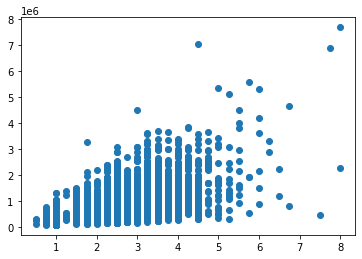

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [6]:
continuous_target_variable= df['price']
strongest_cor= df['bathrooms']
x=strongest_cor
y=continuous_target_variable
plt.scatter(x,y);


plt.show()
plt.figure(figsize=(8, 8))

#### Pre Proccessing 
Decided best to remove these columns as discussed with teammates to try models with out these, as well as changing null values. 

In [7]:
cols_to_drop = ['waterfront','view','condition','id', ]
df = df.drop(cols_to_drop, axis=1)
df.fillna("0", inplace = True)
# From the code Jake used and sent in order to help with the data cleaning 
df["yr_renovated"] = df["yr_renovated"].astype("float64")

# later noticed that sqft_basement was an object instead of float so I'm going to change that as well
# sqft_basement has  454 ? as a placeholder value, so we're going to replace that with 0 (which is already over half of values)
df["sqft_basement"] = df["sqft_basement"].replace("?", "0")
df["sqft_basement"] = df["sqft_basement"].astype("float64")

# changing date from an object to a datetime
df["date"] = df["date"].astype("datetime64")

# feature engineering a month sold and year sold column from date
df["year_sold"] = pd.DatetimeIndex(df['date']).year
df["year_sold"] = df["year_sold"].astype("int32")

df["month_sold"] = pd.DatetimeIndex(df["date"]).month
df["month_sold"] = df["month_sold"].astype("int32")

##### Checking the type the column is

In [8]:
type(df['yr_renovated'])

pandas.core.series.Series

#### Creating new columns using diffrent features used
Creating feature engenering with the data to be used later in testing out models.

In [9]:
df['multiplier']= df['bedrooms'] * df['bathrooms']
df['division_lot_living']= df['sqft_living'] / df['sqft_lot'] 
#df['diffrence'] = df['yr_built'] / (2015 - df['yr_renovated'] )
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,multiplier,division_lot_living
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,7,1180,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,2014,10,3.00,0.208850
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,7,2170,400.0,...,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,6.75,0.354874
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,6,770,0.0,...,0.0,98028,47.7379,-122.233,2720,8062,2015,2,2.00,0.077000
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,7,1050,910.0,...,0.0,98136,47.5208,-122.393,1360,5000,2014,12,12.00,0.392000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,8,1680,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,2015,2,6.00,0.207921


#### Running a basic model for bathrooms, grade, sqft_living, bedrooms, sqft_lot, lat, long to get the r2 value

In [10]:

features = ['bathrooms', 'grade', 'sqft_living','bedrooms','sqft_lot', 'lat', 'long']
X = df[features]
y = df.price

lin_reg_model = LinearRegression() #instantiate 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

# Replace missing values with the median
imputer = SimpleImputer(strategy='median')
# Fit imputer to the indepedent variable
# using only the training data
imputer.fit(X_train)
# Replace missing values in the training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

lin_reg_model.fit( X_train, y_train)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)



print(lin_reg_model.intercept_)
print(lin_reg_model.coef_)

# adjusted R-squared
print(1 - ( 1 - lin_reg_model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

-69362803.35172132
[-1.37733320e+04  8.82899430e+04  2.31828549e+02 -3.77420777e+04
  2.56627705e-02  5.99043856e+05 -3.30648395e+05]
0.6175335551097927


#### Creating a new data fram so I can use it later

In [11]:
df_w4= df[['bedrooms', 'grade', 'sqft_living','price', 'bathrooms']]


#### Running a scatter plot matrix with the data frame above
In order to look at correlation between them visually.

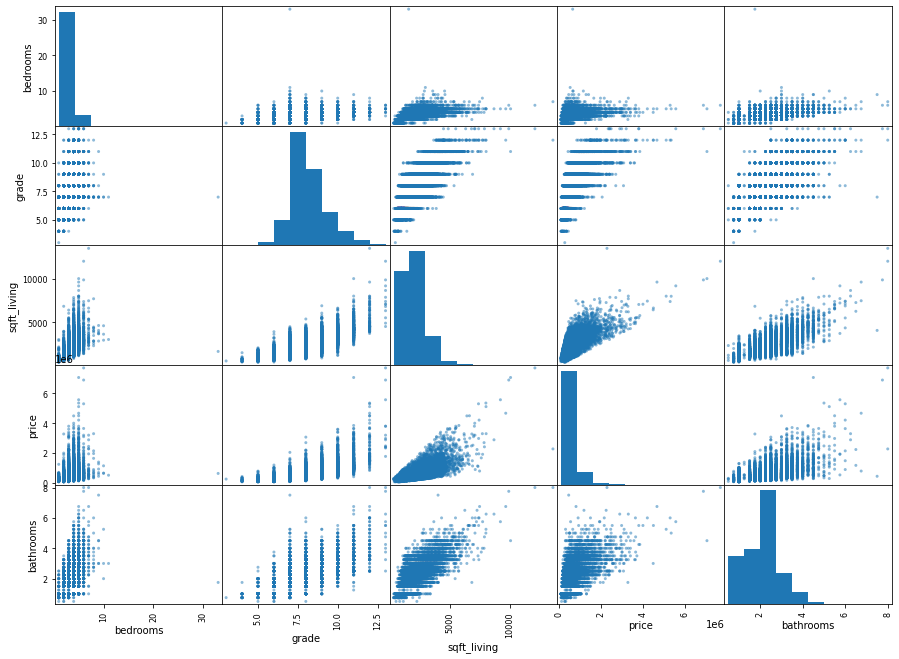

In [12]:
pd.plotting.scatter_matrix(df_w4, figsize=(15,11));
plt.show()

### From here on out there is a lot of testing out data and features compared to price.

#### Removing outliers from the data frame df_w4
In order for us to use the data and try it without the outliers as well as with outliers. To test out the diffrence.

In [13]:
#removing outliers more than 3 std out
df_ch=df_w4[(np.abs(stats.zscore(df_w4["price"])) < 3)]
df_ch=df_w4[(np.abs(stats.zscore(df_w4["bedrooms"])) < 3)]
df_ch=df_w4[(np.abs(stats.zscore(df_w4["sqft_living"])) < 3)]
df_ch=df_w4[(np.abs(stats.zscore(df_w4["grade"])) < 3)]
df_ch=df_w4[(np.abs(stats.zscore(df_w4["bathrooms"])) < 3)]
df_ch.head()

,bedrooms,grade,sqft_living,price,bathrooms
0,3,7,1180,221900.0,1.00
1,3,7,2570,538000.0,2.25
2,2,6,770,180000.0,1.00
3,4,7,1960,604000.0,3.00
4,3,8,1680,510000.0,2.00


#### Running a model for  grade, sqft_living, bedrooms to get the r2 value
Using the data frame df_ch to get an output and look at the values such as intercept and coeficeint and r2.

In [14]:
features = ['grade', 'sqft_living','bedrooms','bedrooms']
X = df_ch[features]
y = df_ch.price

lin_reg_model = LinearRegression() #instantiate 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

# Replace missing values with the median
imputer = SimpleImputer(strategy='median')
# Fit imputer to the indepedent variable
# using only the training data
imputer.fit(X_train)
# Replace missing values in the training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

lin_reg_model.fit( X_train, y_train)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)



print(lin_reg_model.intercept_)
print(lin_reg_model.coef_)

# adjusted R-squared
print(1 - ( 1 - lin_reg_model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

-509350.3470732663
[102509.86044419    176.85189803 -15969.42194386 -15969.42194386]
0.5230938230911764


#### Running a model for bathrooms to get the r2 value and see the correlation 
Using another model to see how well bathrooms would be correlated.

In [15]:
features = ['bathrooms']
X = df_ch[features]
y = df_ch.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

print(mlr.coef_)
print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

[223833.04432695]
0.2397473931300922
0.2397118805830598


#### Running a model for grade to get the r2 value as well as the score and coefficent
Using another model to see how well grade would be correlated. With out doing any feature enginering to the feature.

In [16]:
features = ['grade']
X = df_ch[features]
y = df_ch.price

lin_reg_model = LinearRegression() #instantiate 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

# Replace missing values with the median
imputer = SimpleImputer(strategy='median')
# Fit imputer to the indepedent variable
# using only the training data
imputer.fit(X_train)
# Replace missing values in the training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

lin_reg_model.fit( X_train, y_train)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)



print(lin_reg_model.intercept_)
print(lin_reg_model.coef_)

# adjusted R-squared
print(1 - ( 1 - lin_reg_model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

-952259.8614815382
[194057.06014134]
0.44699535754804254


#### Running a model for  grade, sqft_living to get the r2 value  as well as the score and coefficent
Deciding to continue with grade as the r2 went up in the last model.

In [17]:
features = ['grade', 'sqft_living']
X = df_ch[features]
y = df_ch.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)
print(mlr.coef_)
print(mlr.score(X,y))
#adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

[105047.68708095    154.86700185]
0.5175427262832201
0.5174976515624543


With this r2 value being the highest yet, but not great I decided to start using some of the features I had made earlier in the notebook

#### Changing the data drame I am working with using the featured engineered

In [18]:
df_w4= df[['multiplier', 'grade', 'sqft_living','price', 'division_lot_living']]

#### Running a model for  the df_w4 dataframe to get the r2 value  as well as the score and coefficent
This test using the mean for imputer to see how that will effect r2

In [19]:
lin_reg_model= LinearRegression()
X = df_w4.drop('price',axis = 1)
y = df_w4['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

# Replace missing values with the mean
imputer = SimpleImputer(strategy='mean')
# Fit imputer to the indepedent variable
# using only the training data
imputer.fit(X_train)
# Replace missing values in the training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

lin_reg_model.fit( X_train, y_train)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)



print(lin_reg_model.intercept_)
print(lin_reg_model.coef_)

#adjusted R-squared
print(1 - ( 1 - lin_reg_model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

-612932.4283869133
[-6597.62469494 98826.58323324   206.05609248 53893.32415355]
0.5378362134539112


#### Making predictions on the Training data from the model

In [20]:
# Training set predictions
lm_train_predictions = lin_reg_model.predict(X_train)
lm_train_predictions

array([ 538103.94387403,  462189.86341147, 1117654.50169196, ...,
        264869.00944422,  -44081.11805408,  692174.9624512 ])

#### Finding the Root Mean Squared Error for the model above

In [21]:
new_model = LinearRegression()
new_model.fit(X_train, y_train)
final_predict_train = new_model.predict(X_train)

print('Training Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, final_predict_train)))


Training Root Mean Squared Error: 248748.40957504854


### Running a model for the df_w4 data with all features

In [22]:
X = df_w4.drop('price',axis = 1)
y = df_w4['price']


mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

#print(mlr.coef_)
#print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

0.5379179525949791


#### Running a model for the old dataframe using multiplier, grade, sqft_living against price to get the r2 value  as well as the score and coefficent

In [23]:
X = df[['multiplier', 'grade', 'sqft_living','sqft_lot', 'lat', 'long']]
y = df['price']


mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

#print(mlr.coef_)
#print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

0.6123079119980913


#### Running a model for the old dataframe using multiplier, sqft_living, sqft_lot, floors, grade, lat, long against price to get the r2 value  as well as the score and coefficent

In [24]:
X = df[['multiplier', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'lat', 'long']]
y = df['price']


mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

#print(mlr.coef_)
#print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

0.614357086679844


### In seeing this and discussing with teammates the path they had taken and gotten better r2 and a better Root Mean Squared Error we decided to make this my last model and final model in this notebook

###### Making a final prediction on the Root Mean Squared Error

In [25]:
new_model = LinearRegression()
new_model.fit(X_train, y_train)
final_predict_train = new_model.predict(X_train)
final_predict_test = new_model.predict(X_test)
print('Training Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, final_predict_train)))
print('Test Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, final_predict_test)))

Training Root Mean Squared Error: 227259.61319291565
Test Root Mean Squared Error: 230758.60598991386


###### Making a final prediction on the final model

In [26]:
lm_train_predictions = new_model.predict(X_train)
lm_test_predictions = new_model.predict(X_test)
print(lm_train_predictions)
print(lm_test_predictions)

[ 446900.63652413  336343.48466988 1058300.59315373 ...  236588.29759952
  -52382.01377504  715674.80593774]
[ 164446.04417329  406643.02888371  227436.95562899 ...  968853.35080767
 1469809.32379049  208121.15945183]


###### With this r2 and Root mean squared error it was best for me to make a new notebook and start visualizations for my teammate as we decided to go with their model over mine